Import Library

In [1]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [2]:
image_directory_training="../Dataset/preprocessed_roi_augmentation/5_label/dataset_training"
image_directory_testing="../Dataset/preprocessed_roi_augmentation/5_label/dataset_testing"

GLCM Atribut

In [3]:
#scenario GLCM properties
glcm_properties = ['dissimilarity', 'correlation', 'homogeneity']
# glcm_properties = ['dissimilarity', 'correlation', 'contrast']
# glcm_properties = ['dissimilarity', 'homogeneity', 'contrast']
# glcm_properties = ['correlation', 'homogeneity', 'contrast']
# glcm_properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast']
angles = [0, 45, 90, 135]
distance = [5]

Ekstraksi Fitur HSV + GLCM

In [4]:
def ef_glcm_training(image_directory_training):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_training = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            # features_training.append([np.mean(hue), np.mean(saturation), np.mean(value)] + feature_glcm + [a])
            features_training.append(feature_glcm + [a])

    return features_training


def ef_glcm_testing(image_directory_testing):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_testing = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=distance, angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            # features_testing.append([np.mean(hue), np.mean(saturation), np.mean(value)] + feature_glcm + [a])
            features_testing.append(feature_glcm + [a])

    return features_testing


Inisialisasi Data Training

In [5]:
#NORMALISASI DATA 
extraction_feature = ef_glcm_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [6]:
# train_data = ef_glcm_training(image_directory_training)

In [7]:
# header tabel hsv glcm
header = [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|          0.488831 |           0.511157 |           0.478078 |            0.509996 |       0.0474877 |        0.0473523 |        0.0475717 |         0.0473249 |       0.0230576 |        0.0228276 |        0.0230854 |         0.0228569 |       1 |
+-------

Inisialisasi Data Testing

In [8]:
#NORMALISASI DATA
extraction_feature = ef_glcm_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [9]:
# test_data = ef_glcm_testing(image_directory_testing)

In [10]:
# header tabel hsv glcm
header = [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|          0.493227 |           0.521053 |           0.468731 |            0.504582 |       0.0482594 |        0.0481153 |        0.0484087 |         0.0481535 |       0.0201298 |        0.0198305 |        0.0203448 |         0.0200264 |       1 |
+-------

Klasifikasi Model Naive Bayes

In [11]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [14]:
y_pred = model.predict(X_test)
y_pred

array([2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, 5, 3, 3, 3, 2, 4, 4, 4, 2, 2, 2,
       5, 4, 2, 5, 5, 5, 5, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 4, 3, 3, 4, 4, 3, 3, 2, 3, 3, 5, 3, 3, 5, 4, 5, 5, 4, 3, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 2, 3, 5, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 2, 3, 3, 3, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5,
       2, 2, 5, 5, 5, 5])

In [15]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel hsv glcm
header = [f'{prop} {angle}' for prop in glcm_properties for angle in angles] + ["True Label","Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+--------------+-----------------+
|   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   True Label |   Predict Label |
+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+==============+=================+
|          0.493227 |           0.521053 |           0.468731 |            0.504582 |       0.0482594 |        0.0481153 |        0.0484087 |         0.0481535 |       0.0201298 |        

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.68      0.94      0.79        32
           3       0.57      0.81      0.67        32
           4       0.19      0.16      0.17        32
           5       0.52      0.72      0.61        32

    accuracy                           0.53       160
   macro avg       0.39      0.53      0.45       160
weighted avg       0.39      0.53      0.45       160



C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

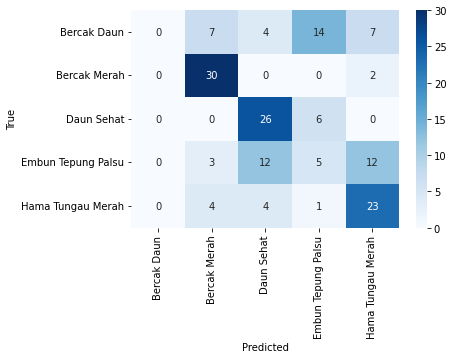

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_labels = ['Bercak Daun', 'Bercak Merah', 'Daun Sehat', 'Embun Tepung Palsu', 'Hama Tungau Merah']

# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
# sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.525
